In [217]:
IMAGES = "Images/"
target = []
image_files = []

for root, dirs, files in os.walk(IMAGES):
    for name in sorted(files):
        filename = os.path.join(root, name)
        image_files.append(filename)
        target.append(name.split(".")[0])
        
target

['blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',


In [218]:
image_files

['Images/blues.00000.jpg',
 'Images/blues.00001.jpg',
 'Images/blues.00002.jpg',
 'Images/blues.00003.jpg',
 'Images/blues.00004.jpg',
 'Images/blues.00005.jpg',
 'Images/blues.00006.jpg',
 'Images/blues.00007.jpg',
 'Images/blues.00008.jpg',
 'Images/blues.00009.jpg',
 'Images/blues.00010.jpg',
 'Images/blues.00011.jpg',
 'Images/blues.00012.jpg',
 'Images/blues.00013.jpg',
 'Images/blues.00014.jpg',
 'Images/blues.00015.jpg',
 'Images/blues.00016.jpg',
 'Images/blues.00017.jpg',
 'Images/blues.00018.jpg',
 'Images/blues.00019.jpg',
 'Images/blues.00020.jpg',
 'Images/blues.00021.jpg',
 'Images/blues.00022.jpg',
 'Images/blues.00023.jpg',
 'Images/blues.00024.jpg',
 'Images/blues.00025.jpg',
 'Images/blues.00026.jpg',
 'Images/blues.00027.jpg',
 'Images/blues.00028.jpg',
 'Images/blues.00029.jpg',
 'Images/blues.00030.jpg',
 'Images/blues.00031.jpg',
 'Images/blues.00032.jpg',
 'Images/blues.00033.jpg',
 'Images/blues.00034.jpg',
 'Images/blues.00035.jpg',
 'Images/blues.00036.jpg',
 

In [219]:
import PIL
from PIL import Image
import numpy as np

data = []

data = np.array([np.array(Image.open(fname)) for fname in image_files])

data.shape

(999, 360, 360, 3)

Text(0.5, 1.0, 'Images/blues.00045.jpg')

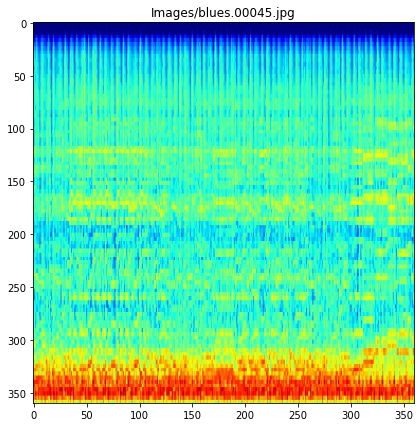

In [220]:
n = 45

plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.imshow(data[n], cmap='gray')
plt.title(image_files[n])

In [221]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

Text(0.5, 1.0, 'pop')

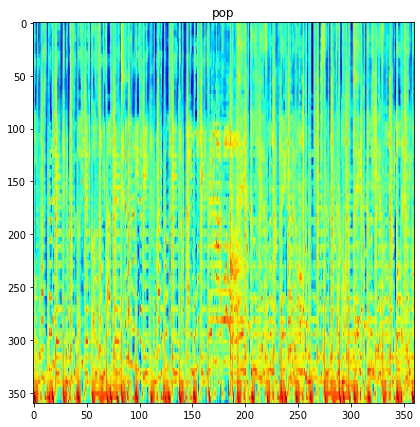

In [222]:
n = 45

plt.figure(figsize=(15, 15))

# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[n], cmap='gray')
plt.title(y_train[n])

In [224]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.

In [229]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)
y_train_le = le.transform(y_train)
y_test_le = le.transform(y_test)

# Change the labels from categorical to one-hot encoding
y_train_one_hot = to_categorical(y_train_le)
y_test_one_hot = to_categorical(y_test_le)

# Display the change for category label using one-hot encoding
for i in range(len(set(y_train))):
    print('\nOriginal label:', y_train[i])
    print('After conversion to one-hot:', y_train_one_hot[i])


Original label: jazz
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

Original label: classical
After conversion to one-hot: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

Original label: blues
After conversion to one-hot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Original label: pop
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

Original label: metal
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

Original label: rock
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

Original label: blues
After conversion to one-hot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Original label: classical
After conversion to one-hot: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

Original label: pop
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

Original label: metal
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [234]:
X_train.shape, X_test.shape, y_train_one_hot.shape, y_test_one_hot.shape

((799, 360, 360, 3), (200, 360, 360, 3), (799, 10), (200, 10))

In [236]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [272]:
num_classes = 10
epochs = 20
batch_size = 64

In [254]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(360,360,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax'))

In [263]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [264]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 360, 360, 32)      896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 360, 360, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 180, 180, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 180, 180, 64)      18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 180, 180, 64)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 90, 90, 64)       0         
 2D)                                                  

In [266]:
train = model.fit(X_train, y_train_one_hot, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test_one_hot))

Epoch 1/20
13/13 [==============================] - 91s 7s/step - loss: 9.2772 - accuracy: 0.1452 - val_loss: 2.1228 - val_accuracy: 0.2850
Epoch 2/20
13/13 [==============================] - 74s 6s/step - loss: 1.9824 - accuracy: 0.2804 - val_loss: 2.0168 - val_accuracy: 0.2900
Epoch 3/20
13/13 [==============================] - 80s 6s/step - loss: 1.7461 - accuracy: 0.3592 - val_loss: 1.7985 - val_accuracy: 0.3500
Epoch 4/20
13/13 [==============================] - 73s 6s/step - loss: 1.5186 - accuracy: 0.4543 - val_loss: 1.5604 - val_accuracy: 0.4300
Epoch 5/20
13/13 [==============================] - 73s 6s/step - loss: 1.2742 - accuracy: 0.5294 - val_loss: 1.4770 - val_accuracy: 0.4850
Epoch 6/20
13/13 [==============================] - 82s 6s/step - loss: 1.0509 - accuracy: 0.6333 - val_loss: 1.6038 - val_accuracy: 0.4700
Epoch 7/20
13/13 [==============================] - 80s 6s/step - loss: 0.8947 - accuracy: 0.6871 - val_loss: 1.2685 - val_accuracy: 0.5500
Epoch 8/20
13/13 [==

In [268]:
model.save("model")

INFO:tensorflow:Assets written to: model/assets


In [280]:
import pickle

with open('Pickle/model_history.pkl', 'wb') as f:
    pickle.dump(train.history, f)

In [282]:
scores = train.history

scores.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

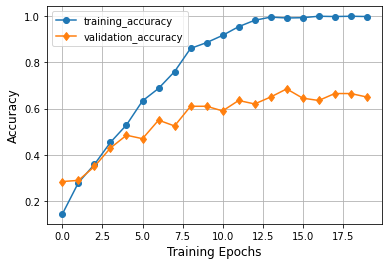

In [288]:
plt.plot(scores['accuracy'], marker='o', label='training_accuracy')
plt.plot(scores['val_accuracy'], marker='d', label='validation_accuracy')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Training Epochs', fontsize=12)
plt.grid()
plt.legend()

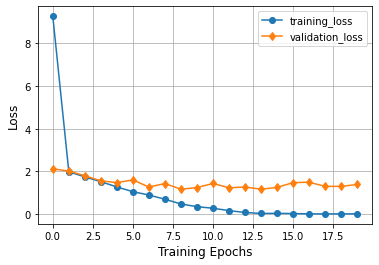

In [289]:
plt.plot(scores['loss'], marker='o', label='training_loss')
plt.plot(scores['val_loss'], marker='d', label='validation_loss')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Training Epochs', fontsize=12)
plt.grid()
plt.legend()

In [290]:
y_pred = model.predict(X_test)

In [292]:
predicted_classes = np.argmax(np.round(y_pred),axis=1)

predicted_classes

array([0, 6, 9, 6, 8, 2, 4, 0, 0, 2, 0, 1, 8, 1, 0, 6, 1, 8, 8, 9, 0, 2,
       6, 7, 0, 0, 7, 7, 0, 6, 3, 4, 1, 0, 2, 5, 7, 6, 8, 6, 7, 5, 0, 3,
       5, 0, 5, 1, 6, 3, 6, 8, 4, 1, 0, 7, 7, 3, 0, 4, 3, 9, 8, 1, 5, 5,
       5, 7, 3, 6, 8, 1, 4, 3, 0, 7, 8, 4, 1, 9, 7, 6, 5, 7, 2, 0, 9, 6,
       2, 1, 2, 4, 4, 6, 1, 4, 0, 4, 8, 0, 5, 9, 8, 1, 2, 2, 7, 5, 7, 9,
       4, 9, 8, 7, 1, 1, 0, 5, 5, 0, 4, 0, 2, 8, 4, 7, 6, 0, 1, 3, 7, 8,
       4, 9, 8, 5, 2, 5, 5, 5, 3, 0, 0, 6, 8, 8, 4, 1, 9, 3, 1, 8, 5, 6,
       9, 4, 0, 9, 8, 0, 7, 1, 5, 7, 6, 2, 3, 0, 0, 1, 6, 1, 3, 2, 9, 8,
       2, 2, 9, 0, 6, 0, 5, 4, 1, 7, 7, 3, 5, 6, 4, 0, 9, 1, 0, 0, 6, 1,
       0, 2])

In [318]:
from scipy import interp
import itertools
from itertools import cycle

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [319]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy =", accuracy_score(y_true=y_test_le, y_pred=predicted_classes))
print("\n\nClassification Report:\n\n", classification_report(y_true=y_test_le, y_pred=predicted_classes, target_names=le.classes_))

Accuracy = 0.64


Classification Report:

               precision    recall  f1-score   support

       blues       0.41      0.64      0.50        22
   classical       0.87      0.91      0.89        22
     country       0.69      0.42      0.52        26
       disco       0.77      0.43      0.56        23
      hiphop       0.78      0.61      0.68        23
        jazz       0.70      0.82      0.76        17
       metal       0.81      0.94      0.87        18
         pop       0.50      0.91      0.65        11
      reggae       0.65      0.50      0.57        26
        rock       0.33      0.42      0.37        12

    accuracy                           0.64       200
   macro avg       0.65      0.66      0.64       200
weighted avg       0.67      0.64      0.64       200



Confusion matrix, without normalization
[[14  1  1  1  0  2  2  0  0  1]
 [ 0 20  1  0  0  1  0  0  0  0]
 [ 6  0 11  0  0  3  0  1  0  5]
 [ 5  2  0 10  1  0  0  3  0  2]
 [ 0  0  0  1 14  0  1  1  5  1]
 [ 2  0  1  0  0 14  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  1  0]
 [ 0  0  1  0  0  0  0 10  0  0]
 [ 5  0  1  1  3  0  0  2 13  1]
 [ 2  0  0  0  0  0  1  3  1  5]]


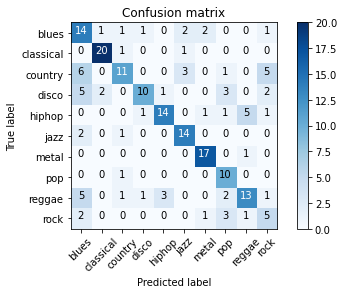

In [320]:
plot_confusion_matrix(confusion_matrix(y_true=y_test_le, y_pred=predicted_classes), 
                      classes=le.classes_)

In [388]:
n = np.random.randint(1000)

n

211

In [389]:
print(target[n])

country


In [390]:
test = data[n]
test = test.astype('float32')/255
test = test.reshape(-1, 360, 360, 3)

prediction = model.predict(test)
prediction = np.argmax(np.round(prediction),axis=1)

print(le.classes_[prediction])

['country']
